In [ ]:
!pip install Ipython

In [ ]:
import IPython
from IPython.display import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving background.jpg to background.jpg


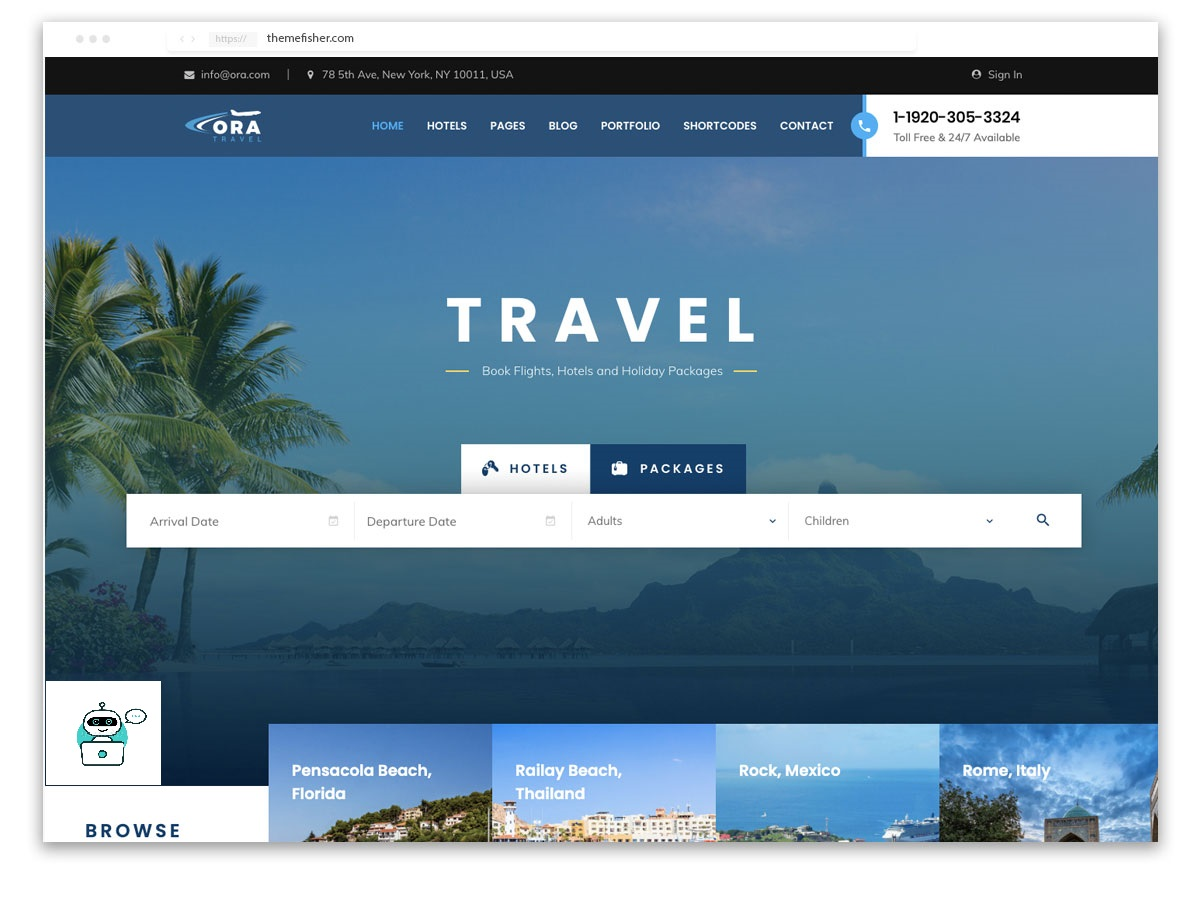

In [ ]:
Image('background.jpg' , width=800 ,height=500)

In [ ]:
import tkinter

In [ ]:
import json
import string
import random 
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# used a dictionary to represent an intents JSON file
data = {"intents": [
             {"tag": "greeting",
              "patterns": ["hello","how are you?","good morning", "good night", "good evening", "how do you do?", "what's up?"],
              "responses": ["Hello", "Fine" , "Good morning", "Good night", "Good evening","I am well" ,"Great Buddy !"],
             },
             {"tag": "name",
              "patterns": ["what is your name?", "what are you called?", "who are you?", "what do you do?"],
              "responses": ["My name is ToGo", "I'm ToGo", "ToGo","I am for travel guidence."]
             },
             {"tag": "tourist points",
              "patterns": ["which are best tourist points?", "can you suggest best tourist points?", "can you suggest destinations for summer season?" ,"can you suggest destinations for rainy season?" ,"can you suggest destinations for winter season?"],
              "responses": ["The best tourist points are The Taj Mahal, Agra,Holy City of Varanasi ,The Golden Temple of Amritsar ,The Golden City: Jaisalmer,The Red Fort, New Delhi , Mumbai: The Gateway of India ,Mecca Masjid, Hyderabad ,Amer Fort,Jaipur.", " For summer season are Manali ,Shimla ,Darjeeling ,Mussoorie ,Nainital ,Gangtok ,Kashmir,Ooty.", " For rainy season are Lonavala – Maharashtra (25°C)Goa , Kodaikanal – Tamil Nadu (22°C) Andaman And Nicobar Islands (35°CCoorg – Karnataka (16°C)Munnar – Kerala (20°C)Ladakh – Jammu And Kashmir (10°C)Udaipur – Rajasthan (30°C)"," For winter season are Auli, Uttarakhand,Binsar, Uttarakhand ,Manali, Himachal Pradesh ,Shimla, Himachal Pradesh ,Great Rann of Kutch, Gujarat ,Goa ,Kerala."],
             },
             {"tag": "date",
              "patterns": ["what are you doing this weekend?","do you want to hang out some time?", "what are your plans for this week" , "can you plan my trip?" "can you suggest destinations for weekend?"],
              "responses": ["I am available all week", "I don't have any plans", "I am not busy","Yes. I will make your trip memorable" ," Yes , where you will love to go ?" , "You can go for  holy areas , crazzy destinations , adventureous points an also for trekking adventure"]
             },
             {"tag": "bookings",
              "patterns": [ "can you give bookings information?", "book tickets for me.", "give my payment details " ,"help in my bookings", "can you check my bookings?", "i want to cancel my bookings.i don't want to go"],
              "responses": ["Sure , your booing id is MH100 and your booked destination is goa.", "Yes,Just min, i wil your tickets.", "your payment id is VADE0B248932 and your payment is received.", "Sure , i will check your bookings" ,"Yes i will xheck bookings", "Your bookings are cancelled."]
             },
             {"tag": "time",
              "patterns": [ "what is weather in goa?", "weather in rajsthan", "wather in gujrat", "weather in delhi", "how much time required to reach goa?"],
              "responses": ["It was nice speaking to you", "See you later", "Speak soon!"]
             },
             {"tag": "filghts",
              "patterns": [ "when is time of filght?", "check my fight details", "send me flight details", "what is date of filght?", "cancel my filghts"],
              "responses": ["It was nice speaking to you", "See you later", "Speak soon!"]
             },
              {"tag": "destinations",
              "patterns": [ "Andhra Pradesh", "Assam", "Arunachal Pradesh", "Bihar", "Goa","Gujarat", "Jammu and Kashmir", "Jharkhand", "West Bengal","Karnataka","Kerala","Madhya Pradesh", "Maharashtra", "Manipur", "Meghalaya", "Mizoram", "Nagaland", "Orissa"],
              "responses": ["It was nice speaking to you", "See you later", "Speak soon!"]
             },
             ,
              {"tag": "inquiry",
              "patterns": [ "where is the goa?", "where is the rajasthan?","what are trek points?", "what are adventure destinations?"],
              "responses": ["Goa is visibly different from the rest of India, owing to Portuguese rule which isolated it from the rest of India for 451 years. The Goan population is a mixture of Hindus and Roman Catholics, the distribution being approximately 65% Hindu and 24% Christian. There is also a smaller Muslim population. Despite this, communal violence has been virtually non-existent and Goa is regarded as one of the most peaceful states in India.", "Rajasthan is a state in the northwest of India. It is mainly arid and its western border is adjacent to Pakistan. The main attraction for travellers is the vast Thar Desert and one of the oldest mountain ranges in the world, the Aravallis. The Rajput heritage which is apparent in the forts, temples and palaces established by the Rajput Kings like Bappa Rawal, Rana Kumbha, Rana Sanga and Rana Pratap are also popular places to visit.", "Tikona Fort. A triangular fort, the Tikona Fort is located in Maval, Maharashtra. ...
Tandulwadi. Tandulwadi is the go-to destination for people longing to go on monsoon treks near Mumbai.
Mahuli Fort
Naneghat
Karnala Fort
Lohagad For
Korigad FortBir-Billing. Go Paragliding in Bir-Billing
Rajasthan. Enjoy Panoramic Views of Rajasthan from a Hot Air Balloon
Rishikesh. Enjoy Cliff Jumping in Rishikesh
Ladakh. Trekkers passing through the Zanskar Lake
Manali. Trekking is fun in Manali
Har Ki Doon Valley
Gulmarg.
Auli"]
             },
             {"tag": "goodbye",
              "patterns": [ "bye", "g2g", "see ya", "adios", "cya"],
              "responses": ["It was nice speaking to you", "See you later", "Speak soon!"]
             }
]}

In [ ]:
# initializing lemmatizer to get stem of words
lemmatizer = WordNetLemmatizer()
# Each list to create
words = []
classes = []
doc_X = []
doc_y = []
# Loop through all the intents
# tokenize each pattern and append tokens to words, the patterns and
# the associated tag to their associated list
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        tokens = nltk.word_tokenize(pattern)
        words.extend(tokens)
        doc_X.append(pattern)
        doc_y.append(intent["tag"])
    
    # add the tag to the classes if it's not there already 
    if intent["tag"] not in classes:
        classes.append(intent["tag"])
# lemmatize all the words in the vocab and convert them to lowercase
# if the words don't appear in punctuation
words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in string.punctuation]
# sorting the vocab and classes in alphabetical order and taking the # set to ensure no duplicates occur
words = sorted(set(words))
classes = sorted(set(classes))

In [ ]:
# list for training data
training = []
out_empty = [0] * len(classes)
# creating the bag of words model
for idx, doc in enumerate(doc_X):
    bow = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in words:
        bow.append(1) if word in text else bow.append(0)
    # mark the index of class that the current pattern is associated
    # to
    output_row = list(out_empty)
    output_row[classes.index(doc_y[idx])] = 1
    # add the one hot encoded BoW and associated classes to training 
    training.append([bow, output_row])
# shuffle the data and convert it to an array
random.shuffle(training)
training = np.array(training, dtype=object)
# split the features and target labels
train_X = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))

In [ ]:
# defining some parameters
input_shape = (len(train_X[0]),)
output_shape = len(train_y[0])
epochs = 200
# the deep learning model
model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(output_shape, activation = "softmax"))
adam = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=["accuracy"])
print(model.summary())
model.fit(x=train_X, y=train_y, epochs=200, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               6144      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 14,725
Trainable params: 14,725
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 1.6265 - accuracy: 0.1200
Epoch 2/200
1/1 [

In [ ]:
def clean_text(text): 
  tokens = nltk.word_tokenize(text)
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

def bag_of_words(text, vocab): 
  tokens = clean_text(text)
  bow = [0] * len(vocab)
  for w in tokens: 
    for idx, word in enumerate(vocab):
      if word == w: 
        bow[idx] = 1
  return np.array(bow)

def pred_class(text, vocab, labels): 
  bow = bag_of_words(text, vocab)
  result = model.predict(np.array([bow]))[0]
  thresh = 0.2
  y_pred = [[idx, res] for idx, res in enumerate(result) if res > thresh]

  y_pred.sort(key=lambda x: x[1], reverse=True)
  return_list = []
  for r in y_pred:
    return_list.append(labels[r[0]])
  return return_list

def get_response(intents_list, intents_json): 
  tag = intents_list[0]
  list_of_intents = intents_json["intents"]
  for i in list_of_intents: 
    if i["tag"] == tag:
      result = random.choice(i["responses"])
      break
  return result

In [ ]:
# running the chatbot
print("Hello, I am your TravelBot!!")
while True:
    message = input("")
    intents = pred_class(message, words, classes)
    result = get_response(intents, data)
    print(result)

Hello, I am your TravelBot!!
I'm ToGo
Good night
Good evening
I don't have any plans
Auli, Uttarakhand,Binsar, Uttarakhand ,Manali, Himachal Pradesh ,Shimla, Himachal Pradesh ,Great Rann of Kutch, Gujarat ,Goa ,Kerala.
Auli, Uttarakhand,Binsar, Uttarakhand ,Manali, Himachal Pradesh ,Shimla, Himachal Pradesh ,Great Rann of Kutch, Gujarat ,Goa ,Kerala.
I don't have any plans
I'm ToGo
I am for travel guidence.
Good night
I am well ,what about you
I am well ,what about you
Speak soon!
Speak soon!
See you later
I am for travel guidence.
See you later
Good night
 Yes , where you will love to go ?
The best tourist points are The Taj Mahal, Agra,Holy City of Varanasi ,The Golden Temple of Amritsar ,The Golden City: Jaisalmer,The Red Fort, New Delhi , Mumbai: The Gateway of India ,Mecca Masjid, Hyderabad ,Amer Fort,Jaipur.
Auli, Uttarakhand,Binsar, Uttarakhand ,Manali, Himachal Pradesh ,Shimla, Himachal Pradesh ,Great Rann of Kutch, Gujarat ,Goa ,Kerala.
Auli, Uttarakhand,Binsar, Uttarakhand ,M

In [ ]:
print("You can view various destinations ,countries and tourist points on google map !")



You can view various destinations , countries and tourist points on google map !


In [ ]:
 !pip install geemap

     |████████████████████████████████| 476 kB 15.1 MB/s 
     |████████████████████████████████| 3.3 MB 55.9 MB/s 
     |████████████████████████████████| 219 kB 61.0 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 98 kB 8.5 MB/s 
     |████████████████████████████████| 130 kB 54.4 MB/s 
     |████████████████████████████████| 1.6 MB 55.7 MB/s 
     |████████████████████████████████| 76 kB 6.0 MB/s 
     |████████████████████████████████| 1.3 MB 50.6 MB/s 
     |████████████████████████████████| 1.2 MB 64.1 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 70 kB 7.9 MB/s 
     |████████████████████████████████| 393 kB 30.0 MB/s 
     |████████████████████████████████| 112 kB 50.8 MB/s 
     |████████████████████████████████| 553 kB 62.6 MB/s 
     |████████████████████████████████| 428 kB 33.8 MB/s 
     |████████████████████

In [ ]:
import ee
import geemap.eefolium as geemap

In [ ]:
Map = geemap.Map()
# Map

In [ ]:
Map.addLayerControl() 
Map